plot histograms from a dataframe

In [1]:
import numpy as np
import pandas as pd
import wx
import os
import sys
import matplotlib.pylab as plt
%matplotlib inline

In [15]:
col_name = 'inter_event_interval'
groupby_factor = 'GT'
num_bins = 50
hist_range = (0,10000)

In [16]:
def get_path(wildcard, title_text):
    app = wx.App(None)
    style = wx.FD_OPEN | wx.FD_FILE_MUST_EXIST
    dialog = wx.FileDialog(None, title_text, wildcard=wildcard, style=style)
    if dialog.ShowModal() == wx.ID_OK:
        path = dialog.GetPath()
    else:
        path = None
        sys.exit()
    dialog.Destroy()
    return path

In [17]:
data_fn = get_path('*.*', 'Choose data file')
data_folder = os.path.split(data_fn)[0]
data_folder = data_folder + '/'
data = pd.read_table(data_fn, delimiter = ',')
print 'loading data file', data_fn
#print data.head(1)
print data.shape

loading data file C:\Users\taneja\Work\gan_lab\all_text_data\results\analysis_random_samples.csv
(23826, 19)


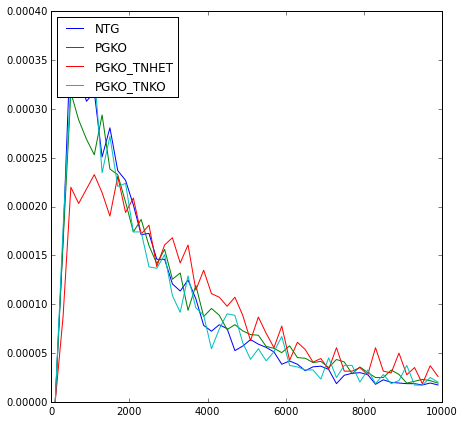

In [18]:
grouped = data.groupby([groupby_factor])
plt.figure(figsize = (7, 7))
for name, group in grouped:
    #plt.hist(group['peak_amp'].values, bins = 100, range = (-50e-12, 0), normed = 1, cumulative=True, histtype='step', label = name)
    #plt.legend(loc = 'upper left')
    hist, bins = np.histogram(group[col_name].values, bins = num_bins, range = hist_range, density = True)
    bin_centers = bins[:-1] + 0.5*(bins[1] - bins[0])
    #print hist
    #print bins
    #print bin_centers
    plt.plot(bin_centers, hist, label = name)
plt.legend(loc = 'upper left')

    